## Predicting Heart Disease using ML

This notebook looks into various Python-based Machine Learning and Data Science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
* 1. Problem Definition
* 2. Data
* 3. Evaluation
* 4. Features
* 5. Modelling
* 6. Experimentation

## 1. Problem Definition
In a statement: Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation
If we can reach 95% of accuracy at predicting whether or not a patient has a heart disease, we'll pursue the project.

## 4. Features
This is where you'll get to know about each of the features in your data.

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Preparing the tools
We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [169]:
# Import all the tools we need for this project

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# To set styles for plotting and visualization - plt.style.available
plt.style.use('fivethirtyeight')
import seaborn as sns

# We want our plots to be inside our notebook
%matplotlib inline

# Import Scikit-Learn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve



## Load Data
Let's load our data...

In [170]:
df = pd.read_csv('./data/new-data-heart-disease.csv');
df.shape

(1025, 14)

## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different type?
3. What's is missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [171]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [172]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

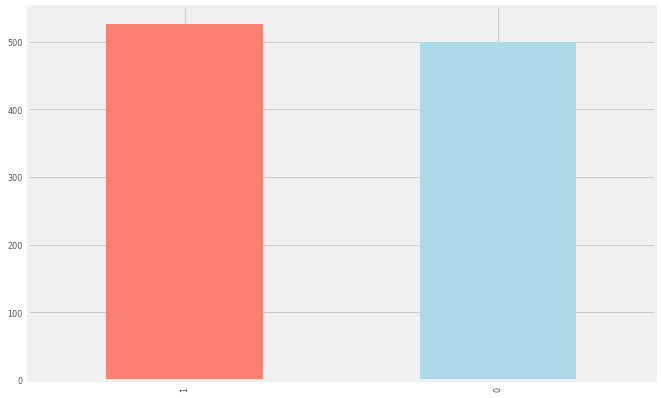

In [173]:
df["target"].value_counts().plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

In [174]:
# Are all the features integers?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [175]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [176]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [177]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [178]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


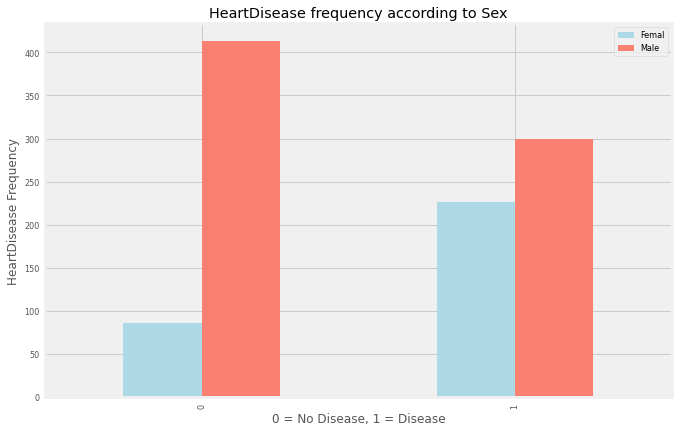

In [179]:
# Let's visualize our HeartDisease frequency according to sex
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"]);
plt.title("HeartDisease frequency according to Sex");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.ylabel("HeartDisease Frequency");
plt.legend(["Femal", "Male"]);

In [180]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

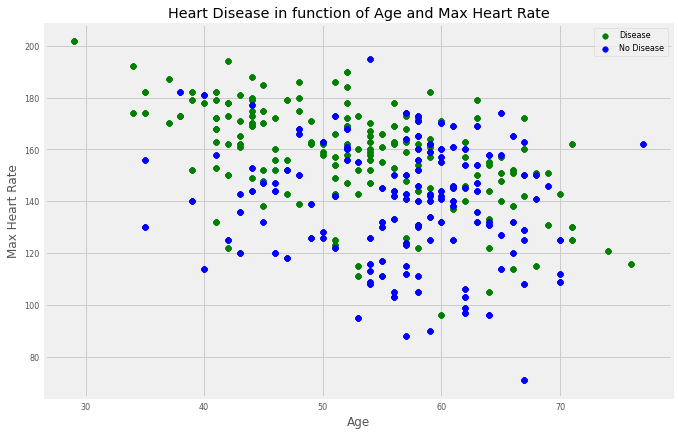

In [181]:
# Create another figure
plt.figure(figsize=(10,6));

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="green");

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="blue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["Disease", "No Disease"]);

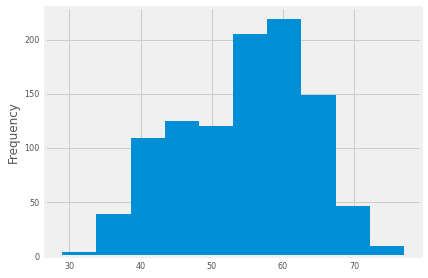

In [182]:
# Check the distribution of age column with Histogram

df.age.plot.hist();

## Heart Disease Frequency per Chest Pain type

CP - Chest Pain Type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [183]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


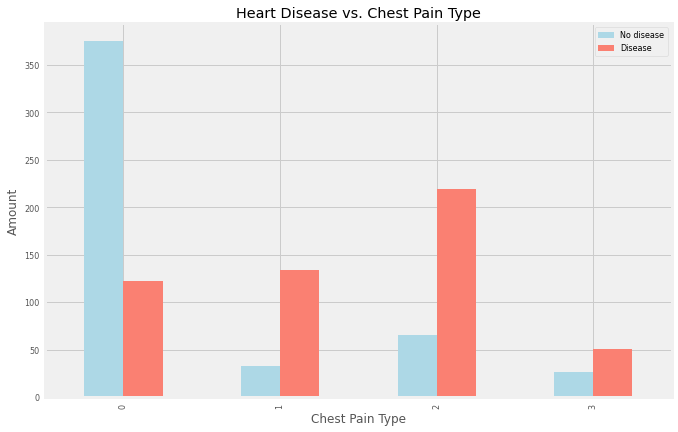

In [184]:
# Let's visualize our crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"]);
plt.title("Heart Disease vs. Chest Pain Type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.legend(["No disease", "Disease"]);

In [185]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


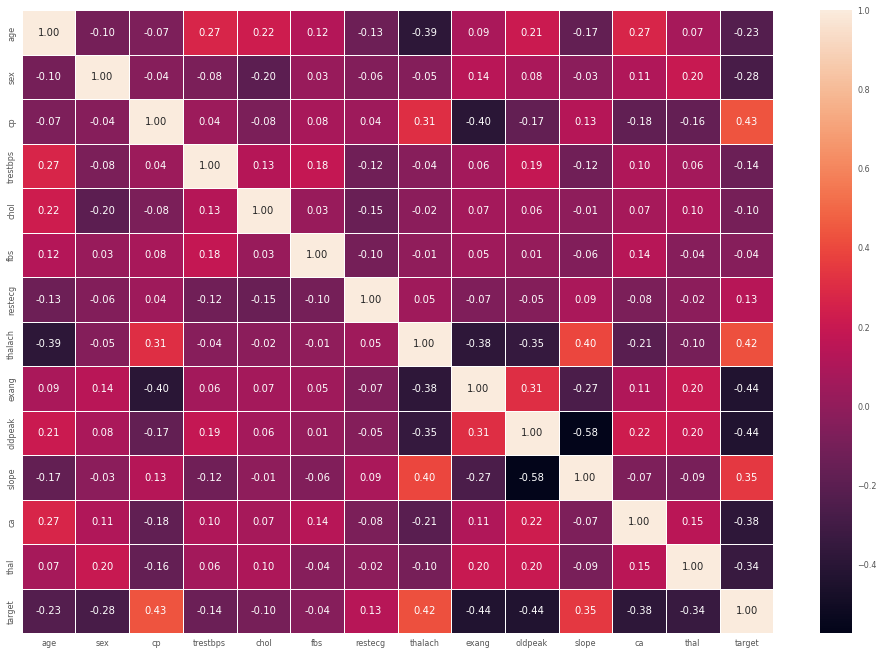

In [189]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.color_palette("Spectral", as_cmap=True)
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f");

## 5. Modelling


In [191]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [198]:
# Split the data into features(X) and labels(Y)
X = df.drop("target", axis=1)
y = df["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [207]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [210]:
# Let's split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [212]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
600,62,0,2,130,263,0,1,97,0,1.2,1,1,3
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
950,67,1,0,160,286,0,0,108,1,1.5,1,3,2
808,51,1,2,94,227,0,1,154,1,0.0,2,1,3
737,67,1,0,120,229,0,0,129,1,2.6,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,67,1,0,160,286,0,0,108,1,1.5,1,3,2
35,46,1,2,150,231,0,1,147,0,3.6,1,0,2
166,56,1,0,132,184,0,0,105,1,2.1,1,1,1
476,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [213]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
519,61,1,0,148,203,0,1,161,0,0.0,2,1,3
999,67,1,0,125,254,1,1,163,0,0.2,1,2,3
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2
510,54,0,1,132,288,1,0,159,1,0.0,2,1,2
482,51,1,0,140,298,0,1,122,1,4.2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,53,1,2,130,246,1,0,173,0,0.0,2,3,2
429,47,1,2,108,243,0,1,152,0,0.0,2,0,2
230,58,1,0,125,300,0,0,171,0,0.0,2,2,3
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3


Now we'have got our data split into training and test sets, it's time to build MachineLearning Model
We'll train it(find the patterns) on training set
And we'll test it(use the patterns) on testing set.

We're going to try 3 different ML models on this dataset:
* 1. LogisticRegression
* 2. K-NearestNeighbors Classifier
* 3. RandomForest Classifier

In [214]:
# Create a function to fit and score the model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep the model score
    model_scores = {};

    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluata a model and append its score to model_scores dictionary
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [215]:
# Let's create a dictionary of models
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}

# Now let's run our models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/bikash/MLGetStarted/HeartDisease-Project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8780487804878049,
 'KNN': 0.7073170731707317,
 'RandomForestClassifier': 0.9853658536585366}

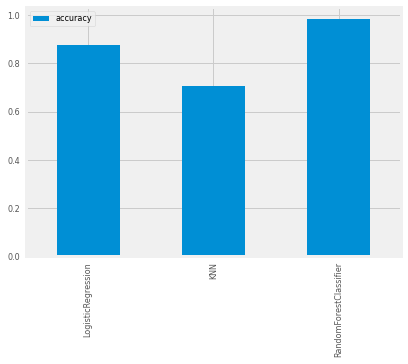

In [217]:
# Let's compare our different models

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model...and we know a model's first predictions aren't always what we should based on our next steps off. What should we do?


Let's look at the following:
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)


## Hyperparameters tuning (by Hand)

#### Let's tune our KNN model

In [223]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [224]:
test_scores

[0.9853658536585366,
 0.8585365853658536,
 0.8048780487804879,
 0.7121951219512195,
 0.7073170731707317,
 0.6439024390243903,
 0.6780487804878049,
 0.6390243902439025,
 0.6780487804878049,
 0.6829268292682927,
 0.6878048780487804,
 0.6731707317073171,
 0.6536585365853659,
 0.6390243902439025,
 0.6634146341463415,
 0.6439024390243903,
 0.6585365853658537,
 0.6487804878048781,
 0.6780487804878049,
 0.6585365853658537]

Maximum KNN score on the test data: 98.54%


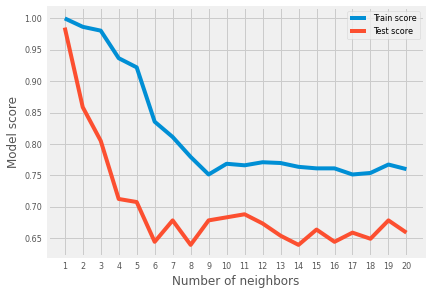

In [225]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [226]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameters grid setup for each of our models, let's tune them using RandomizedSearchCV

In [227]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [228]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [229]:
rs_log_reg.score(X_test, y_test)

0.8780487804878049

Now we've tuned LogisticRegression, let's do the same for RandomForestClassifier

In [230]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup hyperparameter tuning of RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [232]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [287]:
rs_rf.score(X_test, y_test)
print(f"RandomizedSearchCV tuned RandomForestClassifier model has an accuracy of {rs_rf.score(X_test, y_test)*100:.2f}%")

RandomizedSearchCV tuned RandomForestClassifier model has an accuracy of 95.61%



So far we've got the accuracy of 95% with RandomizedSearchCV applied on RandomForestClassifier
We'll improve it by using GridSearchCV

# Hypertuning with GridSearchCV



In [236]:
# Different Hyperparameters for our RandomForestClassifier model
rf_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200]},
             verbose=True)

In [237]:
gs_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [248]:
score = gs_rf.score(X_test, y_test)
print(f"GridSearchCV tuned RandomForestClassifier model has an accuracy of {score*100:.2f}%")

GridSearchCV tuned RandomForestClassifier model has an accuracy of 95.12%


As of now, we came across an accuracy of 95.6% with RandomizedSearchCV of RandomForestClassifier().
## Let's evaluate our tuned machine learning model, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

In [250]:
# Make predictions with tuned RandomizedSearchCV RandomForestClassifier()
y_preds = rs_rf.predict(X_test)

In [251]:
y_preds

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0])

In [258]:
y_test

519    0
999    0
691    1
510    1
482    0
      ..
365    1
429    0
230    0
203    1
425    0
Name: target, Length: 205, dtype: int64

/Users/bikash/MLGetStarted/HeartDisease-Project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


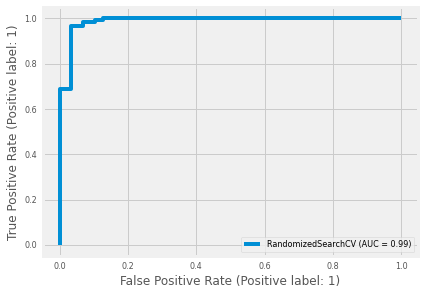

In [254]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test);

In [256]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[ 80   7]
 [  2 116]]


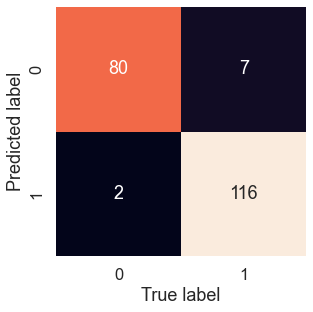

In [263]:
# Let's visualize confusion_matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                    fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1 score.

In [264]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        87
           1       0.94      0.98      0.96       118

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [265]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [284]:
# Create a new classifier with best params
clf = RandomForestClassifier(n_estimators=510, min_samples_split=14, min_samples_leaf=1, max_depth=None)

In [267]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.9902439 , 0.97073171, 0.97560976, 0.97073171, 0.94146341])

In [268]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9697560975609756

In [270]:
# Cross validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.9643964979161593

In [271]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9753638814016172

In [272]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9726003413848016

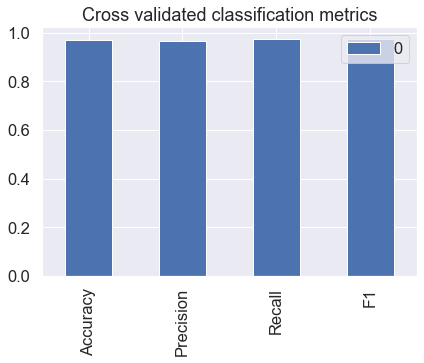

In [273]:
# Let's visualize our cross validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross validated classification metrics");

## Features Importance

Feature importance is another way of asking, "which features contributed most to the outcome of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the features importance of our LogisticRegression model...

In [275]:
clf = RandomForestClassifier(n_estimators=510, min_samples_split=14, min_samples_leaf=1, max_depth=None)

In [281]:
clf.fit(X_train, y_train);

## 6. Experimentation

If you haven't hit your evaluation metric yet...ask yourself

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

## Exporting our model

In [285]:
import pickle
pickle.dump(rs_rf, open('HeartDiseaseClassification_NewModel.sav', 'wb'))

In [291]:
## Let's load and test our model
loaded_model = pickle.load(open('HeartDiseaseClassification_NewModel.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9560975609756097